### Baturhan Çağatay 152120211060
### Onur Dalgıç 152120211068

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv


## Verinin Okunması

In [2]:
import warnings
warnings.filterwarnings('ignore') #to avoid the warning messages
import pandas as pd # CSV'yi okumak için pd.read_csv fonksiyonu tanımlanıyor.
data = pd.read_csv("/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv")
df = data.copy()

# İlk 5 Elemanı Göstermek

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# Son 5 Elemanı Göstermek

In [4]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Datadaki Genel Bilgi

In [5]:
df.info() # Column Adları / Boş İfade Var Mı / Verilerin Data Tipi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
df.shape #  Veri çerçevesinin satır ve sütun sayısı

(383, 17)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,383.0,NaN,NaN,NaN,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
Gender,383,2,F,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,383,2,No,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hx Smoking,383,2,No,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hx Radiothreapy,383,2,No,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thyroid Function,383,5,Euthyroid,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Physical Examination,383,5,Multinodular goiter,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adenopathy,383,6,No,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pathology,383,4,Papillary,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Focality,383,2,Uni-Focal,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.duplicated().sum() # Toplam tekrarlanan satır sayısı

19

Tekrar eden satırların adeti

In [10]:
df[df.duplicated()] # Tekrarlanan satırlar

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


In [11]:
df_copy_copy = df.copy()

In [12]:
df_copy_copy = df_copy_copy.drop_duplicates()

In [13]:
df_copy_copy.shape

(364, 17)

Tekrar eden ifadeler olduğu için farklı bir data_frame oluşturup bu değerleri çıkarttık. 
Ancak işlemlerimize çıkartılmamış dataframe ile devam edeceğiz. 
Çünkü bu hastalıklar aynı özelliklere sahip insanlarda görülebilir.

## Unique Değerleri Çekme

In [14]:
import pandas as pd
from IPython.display import HTML, display

def print_unique_values(df):
    html_content = ""
    for i, column in enumerate(df.columns):
        unique_values = df[column].unique()
        row_color = "#D3D8D3" if i % 2 == 0 else "#FCFFFF"  # Gri ve beyaz renkler
        html_content += f'<div style="background-color:{row_color}; padding:10px;">'
        html_content += f"<strong>Sütun: {column}</strong><br>{unique_values}"
        html_content += "</div>"
    display(HTML(html_content))

# Unique değerleri yazdır
print_unique_values(df)

# Object Tipinden Kategorik Değere Çekme

In [15]:
for column in df.select_dtypes(include='object').columns:  
    df[column] = df[column].astype('category')  # Object türünü Category'e çevirme

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    category
 2   Smoking               383 non-null    category
 3   Hx Smoking            383 non-null    category
 4   Hx Radiothreapy       383 non-null    category
 5   Thyroid Function      383 non-null    category
 6   Physical Examination  383 non-null    category
 7   Adenopathy            383 non-null    category
 8   Pathology             383 non-null    category
 9   Focality              383 non-null    category
 10  Risk                  383 non-null    category
 11  T                     383 non-null    category
 12  N                     383 non-null    category
 13  M                     383 non-null    category
 14  Stage                 383 non-null    category
 15  Respon

# Eksik Değer Var Mı?

In [17]:
missing_values = df.isnull().any()

print(missing_values)

Age                     False
Gender                  False
Smoking                 False
Hx Smoking              False
Hx Radiothreapy         False
Thyroid Function        False
Physical Examination    False
Adenopathy              False
Pathology               False
Focality                False
Risk                    False
T                       False
N                       False
M                       False
Stage                   False
Response                False
Recurred                False
dtype: bool


Hiçbir Sütünda NaN -Eksik Değer- Bulunmuyor

In [18]:
all_nan = df.isnull().all()
all_nan

Age                     False
Gender                  False
Smoking                 False
Hx Smoking              False
Hx Radiothreapy         False
Thyroid Function        False
Physical Examination    False
Adenopathy              False
Pathology               False
Focality                False
Risk                    False
T                       False
N                       False
M                       False
Stage                   False
Response                False
Recurred                False
dtype: bool

Kategorik Değerler İçin:

    -Eksik Verileri Silmek: Eğer eksik veri sayısı çok azsa veya eksik değerler diğer gözlemlerle karşılaştırıldığında göz ardı edilebilirse, bu değerleri direkt olarak silebilirsiniz.
    -Mod İle Doldurmak: Eksik değerleri o sütundaki en yaygın değer olan mod ile doldurabilirsiniz.
    -Eksik Değerleri Belirli Bir Kategori ile Doldurmak: Eksik değerleri, bir "bilinmeyen" veya "diğer" gibi belirli bir kategori ile doldurabilirsiniz.
Sayısal Değerler İçin:

    -Eksik Verileri Silmek: Yine, eksik veri sayısı çok azsa veya eksik değerler diğer gözlemlerle karşılaştırıldığında göz ardı edilebilirse, bu değerleri direkt olarak silebilirsiniz.
    -Ortalama, Medyan veya Mod ile Doldurmak: Eksik değerleri o sütundaki ortalama, medyan veya mod ile doldurabilirsiniz. Genellikle, sayısal verilerde eksik değerleri doldurmak için kullanılan en yaygın yöntemlerden biridir.


# Kategorik DataFrame Oluşturma

In [19]:
kat_df = df.select_dtypes(include='category')
kat_df

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Kategorik Değerler İle Grafikler

# Gender İle İlgili

### Cinsiyet dağılımı (sayısal)

In [20]:
gender_counts = kat_df['Gender'].value_counts() # Gender içindeki sayıları alma
gender_counts

Gender
F    312
M     71
Name: count, dtype: int64

### Cinsiyet dağılımını gösteren bar chart (çubuk grafiği)

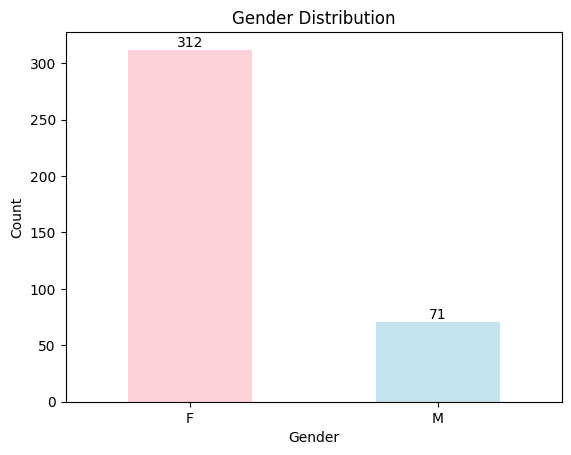

In [21]:
import matplotlib.pyplot as plt

# Bar Grafiği
gender_counts.plot(kind='bar', color=['pink', 'lightblue'], alpha=0.7)

# Grafik başlığı ve eksen etiketleri
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
# Grafik penceresini gösterme
plt.show()

### Cinsiyet dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
## Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=140)

# Grafik başlığı ekleme
plt.title('Gender Distribution')

# Pasta grafiğini gösterme
plt.show()

Grafikte gördüğümüz üzere "Tiroit Hastalığında Kadınların Yakalanma İhtimali Daha Yüksek Gözüküyor"

# Sigara İçme

### Sigara İçme dağılımı (sayısal)

In [ ]:
smoker_counts = kat_df["Smoking"].value_counts()
smoker_counts

### Sigara İçme dağılımını gösteren bar chart (çubuk grafiği)

In [ ]:
import matplotlib.pyplot as plt # Grafik oluşturma ve görselleştirme için matplotlib.pyplot kütüphanesi

# Bar grafiği
smoker_counts.plot(kind='bar', color=['darkorange', 'blue'], alpha=0.7)

# Grafik başlığı
plt.title('Distribution Of Smokers')

# x ekseninin etiketi
plt.xlabel('Smoker')

# y ekseninin etiketi
plt.ylabel('Count')

# x eksenindeki etiketleri düzgün şekilde göstermek için dönme açısı
plt.xticks(rotation=0)

# Sütunların başlıkları
for i, count in enumerate(smoker_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Grafik penceresini gösterme
plt.show()


### Sigara İçme dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=140)

# Grafik başlığı ekleme
plt.title('Distribution Of Smokers')

# Pasta grafiğini gösterme
plt.show()

Grafikte gördüğümüz üzere "Tiroit Hastalığına yakalanan insanların çoğunluğu sigara içmiyor"

# HX Smoking : Sigara İçme Geçmişi

### Sigara İçme Geçmişi dağılımı (sayısal)

In [ ]:
hx_smoker_counts = kat_df["Hx Smoking"].value_counts()
hx_smoker_counts

### Sigara İçme Geçmişi dağılımını gösteren bar chart (çubuk grafiği)

In [ ]:
import matplotlib.pyplot as plt # Grafik oluşturma ve görselleştirme için matplotlib.pyplot kütüphanesi

# Bar grafiği
hx_smoker_counts.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)

# Grafik başlığı
plt.title('Distribution of Historical Smokers')

# x ekseninin etiketi
plt.xlabel('Old Smoker')

# y ekseninin etiketi
plt.ylabel('Count')

# x eksenindeki etiketleri düzgün şekilde göstermek için dönme açısı
plt.xticks(rotation=0)

# Sütunların başlıkları
for i, count in enumerate(hx_smoker_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Grafik penceresini gösterme
plt.show()


### Sigara İçme Geçmişi dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(hx_smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=140)

# Grafik başlığı ekleme
plt.title('Distribution Of Historical Smokers')

# Pasta grafiğini gösterme
plt.show()

Grafikte gördüğümüz üzere "Tiroit Hastalığına yakalanan insanların çoğunluğu geçmişinde sigara içmemiş"

# Hx Radiotherapy: Radyoterapi Alma Geçmişi

### Radyoterapi Alma Geçmişi dağılımı (sayısal)

In [ ]:
hx_radio_counts = kat_df["Hx Radiothreapy"].value_counts()
hx_radio_counts

### Radyoterapi Geçmişi dağılımını gösteren bar chart (çubuk grafiği)

In [ ]:
import matplotlib.pyplot as plt # Grafik oluşturma ve görselleştirme için matplotlib.pyplot kütüphanesi

# Bar grafiği
hx_radio_counts.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)

# Grafik başlığı
plt.title('Distribution of Historical Radiothreapy')

# x ekseninin etiketi
plt.xlabel('Radiothreapy')

# y ekseninin etiketi
plt.ylabel('Count')

# x eksenindeki etiketleri düzgün şekilde göstermek için dönme açısı
plt.xticks(rotation=0)

# Sütunların başlıkları
for i, count in enumerate(hx_radio_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Grafik penceresini gösterme
plt.show()

### Radyoterapi Geçmişi dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(hx_radio_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=140)

# Grafik başlığı ekleme
plt.title('Distribution of Historical Radiothreapy')

# Pasta grafiğini gösterme
plt.show()

Grafikte gördüğümüz üzere "Tiroit Hastalığına yakalanan insanların çoğunluğu geçmişinde radyoterapi tedavisi görmemiş"

# Thyroid Function

### Thyroid Function dağılımı (sayısal)

In [ ]:
thr_counts = kat_df["Thyroid Function"].value_counts()
thr_counts

### Thyroid Function dağılımını gösteren bar chart (çubuk grafiği)

In [ ]:
# Bar grafiği
thr_counts.plot(kind='bar', color = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'],alpha=0.7)

# Grafik başlığı
plt.title('Distribution of Thyroid Functions')

# x ekseninin etiketi
plt.xlabel('Thyroid Function')

# y ekseninin etiketi
plt.ylabel('Count')

# x eksenindeki etiketleri düzgün şekilde göstermek için dönme açısı
plt.xticks(rotation=45)

# Sütunların başlıkları
for i, count in enumerate(thr_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Grafik penceresini gösterme
plt.show()

### Thyroid Function dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(thr_counts, labels=thr_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'], startangle=140)

# Grafik başlığı ekleme
plt.title('Distribution of Thyroid Functions')

# Pasta grafiğini gösterme
plt.show()


1-Euthyroid (İyi Tiroid Fonksiyonu): Veri setinde en yaygın görülen durum, tiroid fonksiyonlarının normal olduğu durumdur. Bu durumda olan hastaların sayısı 332'dir.

2-Clinical Hyperthyroidism (Klinik HiperTiroidizm): HiperTiroidizm, tiroid bezinin aşırı aktif olduğu bir durumdur. Klinik belirtiler gösteren hastaların sayısı 20'dir.

3-Subclinical Hypothyroidism (Subklinik Hipotiroidizm): Subklinik Hipotiroidizm, tiroid bezinin az aktif olduğu, ancak hastada belirgin semptomlar oluşmadığı bir durumdur. Bu durumda olan hastaların sayısı 14'tür.

4-Clinical Hypothyroidism (Klinik Hipotiroidizm): Klinik Hipotiroidizm, tiroid bezinin az aktif olduğu ve hastada belirgin semptomların olduğu bir durumdur. Bu durumda olan hastaların sayısı 12'dir.

5-Subclinical Hyperthyroidism (Subklinik HiperTiroidizm): Subklinik HiperTiroidizm, tiroid bezinin aşırı aktif olduğu, ancak hastada belirgin semptomlar oluşmadığı bir durumdur. Bu durumda olan hastaların sayısı 5'tir.








# Physical Examination

### Physical Examination dağılımı (sayısal)

In [ ]:
phy_exa = kat_df["Physical Examination"].value_counts()
phy_exa

### Physical Examination dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(phy_exa, labels=phy_exa.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'], startangle=140)

# Grafik başlığı ekleme
plt.title('Distribution of Physical Examination')

# Pasta grafiğini gösterme
plt.show()

1-Multinodüler Goiter: Tiroid bezinde birden fazla nodül bulunması durumu. Bu, tiroid bezinin diffüz olarak büyümesi ve birden fazla nodül oluşumuyla karakterizedir. Veride 140 hasta bu durumu gösteriyor.

2-Tek Nodüler Goiter - Sağ Taraflı: Tiroid bezinde sadece tek bir nodülün olduğu ve bu nodülün sağ tarafta bulunduğu durum. Veride 140 hasta bu durumu gösteriyor.

3-Tek Nodüler Goiter - Sol Taraflı: Tiroid bezinde sadece tek bir nodülün olduğu ve bu nodülün sol tarafta bulunduğu durum. Veride 89 hasta bu durumu gösteriyor.

4-Diffüz Goiter: Tiroid bezinin genel olarak büyümesi durumu, ancak belirgin bir nodül oluşumu olmaksızın. Veride 7 hasta bu durumu gösteriyor.

5-Normal: Tiroid bezinin normal boyutlarda olduğu durum. Veride 7 hasta bu durumu gösteriyor.

# Adenopathy: Boyun bölgesinde büyümüş lenf düğümlerinin (adenopati) varlığı veya yokluğu

### Adenopathy (sayısal)

In [ ]:
ade_counts = kat_df["Adenopathy"].value_counts()
ade_counts

### Adenopathy dağılımını gösteren horizontal bar chart (yatay çubuk grafiği)

In [ ]:
# Veri
ade_count = [277, 48, 32, 17, 7, 2]
categories = ['No', 'Right', 'Bilateral', 'Left', 'Extensive', 'Posterior']
total_count = sum(ade_count)

# Yatay çubuk grafik (bar plot)
plt.figure(figsize=(12, 8))
bars = plt.barh(categories, ade_count, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'])
plt.xlabel('Number of patients')
plt.ylabel('Adenopathy Condition')
plt.title('Adenopathy Status Distribution')

# Her bir çubuğun üzerine sayıları ve yüzde değerlerini yazma
for bar, count in zip(bars, ade_count):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} ({count/total_count:.1%})', ha='left', va='center')

plt.gca().invert_yaxis()  # Y ekseni ters çevirme
plt.show()


1-No (Hayır): Bu kategori, hastaların boyun bölgelerinde herhangi bir lenf bezi büyümesinin olmadığını ifade eder. Toplamda 277 hasta bu durumu gösteriyor.

2-Right (Sağ): Bu kategori, hastaların boyunlarında sadece sağ tarafta lenf bezi büyümesi olduğunu ifade eder. Toplamda 48 hasta bu durumu gösteriyor.

3-Bilateral (İki Taraflı): Bu kategori, hastaların boyunlarında her iki tarafta da lenf bezi büyümesi olduğunu ifade eder. Toplamda 32 hasta bu durumu gösteriyor.

4-Left (Sol): Bu kategori, hastaların boyunlarında sadece sol tarafta lenf bezi büyümesi olduğunu ifade eder. Toplamda 17 hasta bu durumu gösteriyor.

5-Extensive (Geniş Alanlı): Bu kategori, hastaların boyunlarında lenf bezlerinin geniş bir alanda büyüdüğünü ifade eder. Toplamda 7 hasta bu durumu gösteriyor.

6-Posterior (Arka): Bu kategori, hastaların boyunlarında lenf bezlerinin arka bölgesinde büyüme olduğunu ifade eder. Toplamda 2 hasta bu durumu gösteriyor.

# Pathology: Biyopsi örneklerinin patoloji incelemesi ile belirlenen belirli tiroid kanseri türleri

### Pathology dağılımı (sayısal)

In [ ]:
pth_counts = kat_df["Pathology"].value_counts()
pth_counts

1-Papiller (Papillary): Papiller tiroid karsinomu en yaygın tiroid kanseri türüdür. Papiller tiroid karsinomu, tiroid hücrelerinin dış kısmındaki foliküler hücrelerden kaynaklanır. Veride, papiller tiroid karsinomu olan hastaların sayısı 287'dir.

2-Mikropapiller (Micropapillary): Mikropapiller tiroid karsinomu, papiller tiroid karsinomunun daha küçük boyutlu bir alt türüdür. Mikropapiller yapılar, tıpkı papiller karsinomda olduğu gibi tiroid hücrelerinin dış kısmındaki foliküler hücrelerden kaynaklanır. Veride, mikropapiller tiroid karsinomu olan hastaların sayısı 48'dir.

3-Foliküler (Follicular): Foliküler tiroid karsinomu, tiroid bezinin foliküler hücrelerinden kaynaklanan bir tür tiroid kanseridir. Papiller tiroid karsinomuna benzer şekilde, bu kanser türü de tiroid bezinin hücrelerinden kaynaklanır. Veride, foliküler tiroid karsinomu olan hastaların sayısı 28'dir.

4-Hurthel Hücreli (Hurthel Cell): Hurthel hücreli tiroid karsinomu, foliküler tiroid hücrelerinin aşırı büyümesiyle karakterize edilen bir tür tiroid kanseridir. Veride, Hurthel hücreli tiroid karsinomu olan hastaların sayısı 20'dir.

### Pathology dağılımını gösteren horizontal bar chart (yatay çubuk grafiği)

In [ ]:
# Patoloji verisi
path_count = [287, 48, 28, 20]
path_categories = ['Papillary', 'Micropapillary', 'Follicular', 'Hurthel cell']
total_path_count = sum(path_count)

# Yatay çubuk grafik (bar plot)
plt.figure(figsize=(10, 6))
bars = plt.barh(path_categories, path_count, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.xlabel('Hasta Sayısı')
plt.ylabel('Patoloji Türü')
plt.title('Patoloji Durumu Dağılımı')

# Her bir çubuğun üzerine sayıları ve yüzde değerlerini yazma
for bar, count in zip(bars, path_count):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} ({count/total_path_count:.1%})', ha='left', va='center')

plt.gca().invert_yaxis()  # Y ekseni ters çevirme
plt.show()


Papillary: Papiller tiroid kanseri türüdür. Genellikle en yaygın ve tedavi edilebilir türdür.

Micropapillary: Mikropapiller tiroid kanseri türüdür. Papiller tiroid kanserinin bir alt türüdür ve daha küçük hücre kümeleri içerir.

Follicular: Folliküler tiroid kanseri türüdür. Folliküler hücrelerde başlar ve papiller tiroid kanserinden sonra ikinci en yaygın türdür.

Hurthel cell: Hurthel hücreli tiroid kanseri türüdür. Diğerlerinden daha agresif olabilir ve farklı tedavi gerektirebilir.



Grafikte gördüğümüz üzere, "Tiroit Hastalığına yakalanan insanların çoğunluğu Papiller tiroid kanseri türüne sahip."

# Focality: Kanserin tek odaklı (tek bir lokasyonla sınırlı) veya multifokal (birden fazla lokasyonda mevcut) olup olmadığı.

### Focality dağılımı (sayısal)

In [ ]:
fctl_counts = kat_df["Focality"].value_counts()
fctl_counts

### Focality dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
import matplotlib.pyplot as plt

# Assuming rsk is your pandas Series or DataFrame containing the distribution of risk categories

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Plot a pie chart
ax.pie(fctl_counts, autopct='%0.2f%%', explode=[0.05, 0.08], labels=fctl_counts.index, shadow=True)

# Add title to the plot
ax.set_title('Distribution of Risk')

# Show the pie chart
plt.show()


1-Uni-Focal (Tek Odaklı): Bu kategori, hastaların tiroid bezinde sadece bir odak veya nodül olduğunu ifade eder. Yani, tek bir odaklanma alanı bulunur. Veride, tek odaklı nodülü olan hastaların sayısı 247'dir.

2-Multi-Focal (Çoklu Odaklı): Bu kategori, hastaların tiroid bezinde birden fazla odak veya nodül olduğunu ifade eder. Yani, birden fazla odaklanma alanı bulunur. Veride, çoklu odaklı nodülü olan hastaların sayısı 136'dır.

# Risk : Kanserin risk kategorisi, tümör boyutu, yayılma derecesi ve histolojik tip gibi çeşitli faktörlere dayanmaktadır.

### Risk dağılımı (sayısal)

In [ ]:
rsk = kat_df["Risk"].value_counts()
rsk

### Risk dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
import matplotlib.pyplot as plt

# Assuming rsk is your pandas Series or DataFrame containing the distribution of risk categories

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Plot a pie chart
ax.pie(rsk, autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=rsk.index, shadow=True)

# Add title to the plot
ax.set_title('Distribution of Risk')

# Show the pie chart
plt.show()


* Low (Düşük): Kanser riskinin düşük olduğu kategoridir. Bu genellikle tümörün küçük boyutta ve yayılmanın sınırlı olduğu durumlar için geçerlidir.
* Intermediate (Orta): Kanser riskinin orta düzeyde olduğu kategoridir. Bu genellikle tümörün orta boyutta ve yayılmanın orta derecede olduğu durumlar için geçerlidir.
* High (Yüksek): Kanser riskinin yüksek olduğu kategoridir. Bu genellikle tümörün büyük boyutta ve yayılmanın yaygın olduğu durumlar için geçerlidir.

# T : Tümör sınıflandırması, boyutuna ve yakındaki yapılara yayılma derecesine göre yapılır.

### Tümör dağılımı (sayısal)

In [ ]:
T = kat_df["T"].value_counts()
T

### Tümör dağılımını gösteren line plot (çizgi grafik)

In [ ]:
# Grafik oluşturma ve görselleştirme için matplotlib.pyplot ve seaborn kütüphanesi

import seaborn as sns
import matplotlib.pyplot as plt

value_counts = df["T"].value_counts()
sns.lineplot(x=value_counts.index, 
             y=value_counts.values, 
             markers=True,
             dashes=False)
plt.title('Distribution Of T')
plt.show()


### Tümör dağılımını gösteren pie chart (pasta grafik)

In [ ]:
# Pasta grafiği çizimi
# Renkler listesi oluşturma
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']

# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(T, labels=T.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Grafik başlığı ekleme
plt.title('Distrubtion Of T')

# Pasta grafiğini gösterme
plt.show()


* T1a: Tümör küçük boyutta ve çevre dokulara sınırlı yayılma gösteriyor.
* T1b: Tümör küçük boyutta olsa da, T1a'dan daha fazla yayılma gösteriyor.
* T2: Orta boyutta bir tümör, ancak çevre dokulara yayılma gösteriyor.
* T3a: Orta büyüklükte bir tümör, ancak yayılma daha ileri düzeyde.
* T3b: T3a'dan daha fazla yayılma gösteren bir tümör.
* T4a: Tümör büyük boyutta ve çevredeki yapılarına yayılma gösteriyor.
* T4b: T4a'dan daha fazla yayılma gösteren bir tümör, çoğu zaman ileri evre kanserlerde görülür.

# N: Lenf düğümlerinin tutulumunu gösteren düğüm sınıflandırması.

### Lenf düğümleri dağılımı (sayısal)

In [ ]:
N = kat_df["N"].value_counts()
N

### Lenf Düğümlerinin dağılımını gösteren pie chart (pasta grafik)

In [ ]:
# Renkler listesi oluşturma
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(N, labels=N.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Grafik başlığı ekleme
plt.title('Distribution Of N')

# Pasta grafiğini gösterme
plt.show()


* N0: Lenf nodlarına yayılma yok.
* N1a: Kanser lenf nodlarına yayıldı, ancak sınırlı sayıda lenf nodu tutuldu.
* N1b: Kanser lenf nodlarına yayıldı ve daha fazla lenf nodu tutuldu.

# M : Uzak metastazların varlığını veya yokluğunu gösteren metastaz sınıflandırması

### Uzak Metastazların dağılımı (sayısal)

In [ ]:
M = kat_df["M"].value_counts()
M

### Uzak Metastazların dağılımını gösteren line plot (çizgi grafik)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = df["M"].value_counts()
sns.lineplot(x=value_counts.index, 
             y=value_counts.values, 
             markers=True,
             dashes=False)
plt.title('Distribution Of M')
plt.show()


* M: Metastaz sınıflandırması, kanserin vücudun başka bölgelerine yayılma durumunu belirtir. Uzak metastazlar, kanserin daha ileri evrelerini ve genellikle daha agresif bir tedavi gerektiren durumlarını gösterebilir.
    * M0: Uzak metastaz yok.
    *M1: Kanser başka bölgelere (uzak organlara veya dokulara) metastaz yapmış.

### Uzak Metastazların dağılımını gösteren pie chart (pasta grafiği)

In [ ]:
# Renkler listesi oluşturma
colors = ['lightgreen', 'lightcoral']

# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarlama
plt.pie(M, labels=M.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Grafik başlığı ekleme
plt.title('Distribution Of M')

# Pasta grafiğini gösterme
plt.show()

# Stage : Kanserin genel evresi, tipik olarak T, N ve M sınıflandırmalarının birleştirilmesiyle belirlenir.

### Stage dağılımı (sayısal)

In [ ]:
stage = kat_df["Stage"].value_counts()
stage

* "Stage I" evresinde 333 hasta bulunmaktadır. Bu, kanser evresinin birincil aşamasında olan hastaların sayısını belirtir. 
* Benzer şekilde, "Stage II" evresinde 32 hasta, 
* "Stage IVB" evresinde 11 hasta, 
* "Stage III" evresinde 4 hasta ve 
* "Stage IVA" evresinde 3 hasta bulunmaktadır.

### Stage dağılımını gösteren count plot (sayı grafiği)

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=df)
plt.title('Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

Grafikte görüldüğü üzere, "Tiroit Hastalığına yakalanan insanların çoğunluğu, hastalığın erken evrelerinde (Stage I) teşhis edilmiştir."

# Response : Tedaviye yanıt; kanserin tedaviden sonra olumlu mu, olumsuz mu yanıt verdiğini veya stabil kalıp kalmadığını gösterir.

### Response dağılımı (sayısal)

In [ ]:
response = kat_df["Response"].value_counts()
response

### Response dağılımını gösteren count plot (sayı grafiği)

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=df)
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

1- Excellent (Mükemmel): Toplamda 208 hasta tedaviye mükemmel yanıt verdi. Bu hastaların kanserleri, tedavinin etkisiyle belirgin bir şekilde küçülmüş veya tamamen yok olmuş olabilir.

2- Structural Incomplete (Yapısal Olarak Tamamlanmamış): 91 hasta tedavinin yapısal olarak tamamlanmadığı bir yanıt gösterdi. Bu durumda, kanser belirli bir tedaviye rağmen hala belirgin bir şekilde mevcut olabilir veya tedaviye rağmen büyümeye devam edebilir.

3- Indeterminate (Belirsiz): 61 hastanın tedaviye verdiği yanıt belirsizdir. Yani, tedavinin etkisinin net bir şekilde değerlendirilemediği durumlarla karşı karşıyayız.

4- Biochemical Incomplete (Biyokimyasal Olarak Tamamlanmamış): 23 hasta tedaviye biyokimyasal olarak tam yanıt vermemiştir. Bu durumda, kanser hücrelerinin biyokimyasal özellikleri değişmemiş olabilir ve tedavinin etkisi belirgin değildir.

Recurred İle response birlikte incelenmiş olarak çaprazlama yapılmıştır.

## Age İle Grafikler

In [ ]:
age = df["Age"].value_counts()
age

In [ ]:
age_counts = df["Age"].value_counts().sort_index() # İndeksleri sıraya sokma

print(age_counts)

### Yaş dağılımını gösteren histogram

In [ ]:
# Histogram çizimi
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', label='Frekans')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.title('Yaş Dağılımı')



### Yaş dağılımını gösteren histogram ve KDE (Kernel Density Estimate)

In [ ]:
# Age distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'midnightblue', edgecolor = 'black') # KDE Çizimi
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Histogramda görüldüğü gibi, 30-35 yaş aralığında en yüksek yoğunluk gözlemlenmektedir.

KDE eğrisi, 30'lu yaşlarda bir zirveye ulaşarak yoğunluklu bir dağılım gösterir. 
Bu, 30-35 yaş aralığındaki kişilerin tiroit hastalığına yakalanma olasılığının daha yüksek olduğunu gösterir.

Yaş arttıkça, histogram çubuklarının yüksekliği ve KDE eğrisinin yoğunluğu azalmaktadır, bu da yaş arttıkça tiroit hastalığına yakalanma olasılığının azaldığını göstermektedir.

### Yaş dağılımını gösteren violin grafiği 

In [ ]:
import seaborn as sns

# Violin grafiği çizimi
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Age', color='skyblue')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.title('Yaş Dağılımı')
plt.show()


Violin grafiğinde, 30-40 yaş aralığında yoğun bir dağılım görülmektedir.

Bu yaş aralığında yoğunluğun yüksek olması, 30-40 yaşlarındaki kişilerin tiroit hastalığına daha sık yakalandığını gösterir.

40 yaşın üzerinde ve 20 yaşın altında yoğunluk azalmakta, bu da daha genç ve daha yaşlı kişilerin tiroit hastalığına daha az sıklıkla yakalandığını göstermektedir.

# Çaprazlamalar

## Kategorik - Numerik Arası

### Age-Gender dağılımı gösteren bir sütun grafiği (count plot) 

In [ ]:
# Renkler listesi oluşturma
colors = ["pink", "lightblue"]

# Sütun grafiği çizimi
plt.figure(figsize=(30, 12))
ax = sns.countplot(x='Age', hue='Gender', data=df, palette=colors)
plt.title('Age vs. Gender', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12),

# Sütunların Üzerine Sayıların Eklenmesi
for p in ax.patches:
    if p.get_height() != 0:  # Sütun yüksekliği 0 değilse
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=12)

plt.show()



31 yaşındaki kadınlar, 15 vaka ile en yüksek sayıda temsil edilmektedir.
30-35 yaş aralığında kadın vakalarının yüksek yoğunlukta olduğu görülmektedir.

Erkek vakaları, kadın vakalarına göre daha az sayıdadır. 
Kadınlarda olduğu gibi 31 yaşındaki erkekler 7 vaka ile en yüksek sayıda temsil edilmektedir.

Kadınlarda, 20'li yaşlardan 50'li yaşlara kadar geniş bir yaş aralığında yüksek vaka sayıları gözlemlenmektedir.
Erkeklerde ise, 30'lu yaşlarda belirli bir artış gözlemlenmekte ancak kadınlara göre daha az yoğunluk göstermektedir.


Ayrıca, Kadınlar, her yaş grubunda erkeklerden daha fazla vaka sayısına sahiptir.

### Age - Smoker

### Yaş ve Sigara içme durumunu gösteren Scatter Plot (serpiştirme grafiği)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dikey grafik oluşturma
fig, ax = plt.subplots(figsize=(6, 8))
sns.scatterplot(x='Smoking', y='Age', data=df, sizes=(20, 200), legend=False, ax=ax)
ax.set_xlabel('Smoking')
ax.set_ylabel('Age')
plt.title('Age vs Smoking')
plt.show()

### Yaş ve Sigara içme durumunu gösteren Histogram

In [ ]:
# Veriler
age = df["Age"]
smoker = df["Smoking"]

# İçenlerin ve içmeyenlerin yaş dağılımını ayırma
age_smoker = age[smoker == 'Yes']
age_non_smoker = age[smoker == 'No']

# Histogram çizimi
plt.figure(figsize=(10, 6))
plt.hist(age_smoker, bins=20, color='red', alpha=0.7, label='Smoker')
plt.hist(age_non_smoker, bins=20, color='darkgray', alpha=0.7, label='Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Smoking Status')
plt.legend()
plt.grid(True)  # Izgara ekleme
plt.show()


### Yaş ve Sigara içme durumunu gösteren Violin Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setinden uygun sütunları içeren bir DataFrame oluşturma
age_smoker_df = df[['Age', 'Smoking']]

# Violin plot çizimi
plt.figure(figsize=(8, 6))
sns.violinplot(data=age_smoker_df, x='Age', y='Smoking', color='lightgreen', linewidth=2);
plt.title('Violin Plot of Age for Smokers')
plt.xlabel('Age')
plt.grid(True)  # Izgara ekleme
plt.show();




### Age-Adenopathy

### Adenopati durumuna göre Yaşların dağılımını gösteren bir Swarm plot

In [ ]:
#the distribution of ages based on the presence and location of adenopathy using a swarm plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Adenopathy', y='Age', data=data, palette='OrRd', hue='Adenopathy', dodge=True)
plt.title('Distribution of Ages based on Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Adenopathy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No: Adenopati olmayan bireylerin yaşları geniş bir aralığa yayılmıştır, çoğunlukla 20-60 yaş aralığındadır.

Right: Sağda adenopati olan bireyler genellikle 20-60 yaş aralığındadır.

Extensive: Yaygın adenopati olan bireyler 30-70 yaş aralığındadır.

Left: Solda adenopati olan bireyler 20-70 yaş aralığındadır.

Bilateral: İki taraflı adenopati olan bireyler genellikle 30-70 yaş aralığındadır.

Posterior: Arka bölgede adenopati olan bireyler 40-80 yaş aralığındadır.

### Age - Recurred

### Yaş ve Reccured arasındaki ilişkiyi gösteren bir sütun grafiği

In [ ]:
# Renkler listesi oluşturma
colors = ["lightblue", "lightsalmon"]

# Sütun grafiği çizimi
plt.figure(figsize=(20, 10))  # Grafiğin boyutunu yeniden ayarlama
ax = sns.countplot(x='Age', hue='Recurred', data=df, palette=colors)
plt.title('Age vs. Recurrence', fontsize=24)  # Başlık font boyutunu ayarlama
plt.xlabel('Age', fontsize=18)  # X eksen etiketi font boyutunu ayarlama

plt.ylabel('Count', fontsize=18)  # Y eksen etiketi font boyutunu ayarlama
plt.legend(title='Recurred', fontsize=14)  # Legend font boyutunu ayarlama
plt.xticks(rotation=45,fontsize=14)  # X ekseninin tick (işaret) font boyutunu ayarlama
plt.yticks(fontsize=14)  # Y ekseninin tick (işaret) font boyutunu ayarlama

# Her bir çubuğun üzerine sayıları yazma
for p in ax.patches:
    if p.get_height() != 0:  # Sütun yüksekliği 0 değilse
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=12)

plt.show()


Nüks olmayan bireyler genellikle her yaş grubunda daha fazladır.

Nüks olan bireyler daha az sayıda olup, 55 yaşından sonra nüks olan bireylerin nüks olmayan bireylere göre oranının arttığı görülmektedir.

### Age-Risk

### Yaşların Risk kategorilerine göre dağılımını gösteren bir Violin Plot

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Risk', y='Age', data=data, palette='OrRd', inner='quartile')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

Low Risk: Düşük risk kategorisinde yaşlar genellikle 20 ile 30 arasında yoğunlaşmıştır.

Intermediate Risk: Orta risk kategorisinde yaşlar genellikle 25 ile 35 arasında yoğunlaşmıştır.

High Risk: Yüksek risk kategorisinde yaşlar genellikle 60 ile 70 arasında yoğunlaşmıştır.

### Kategorik - Kategorik Arası Çaprazlamalar

### Recurred Vs Response

### Tedaviye yanıt ve Tekrar oranını gösteren bir Sütun Grafiği

In [ ]:
# Renkler listesi oluşturma
colors = ["darkblue", "lightsalmon"]

# Sütun grafiği çizimi
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', hue='Recurred', data=df, palette=colors)
plt.title('Response to Treatment vs. Recurrence')
plt.xlabel('Response to Treatment')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.show()


Biochemical Incomplete: Bu kategoride düşük sayıda hem tekrarlama olan hem de olmayan vakalar bulunmaktadır.

Excellent: Bu kategoride neredeyse tamamı tekrarlama olmayan vakalar bulunmaktadır.

Indeterminate: Bu kategoride çoğunluk tekrarlama olmayan vakalardır.

Structural Incomplete: Bu kategoride çoğunlukla tekrarlama olan vakalar bulunmaktadır.

## Hx Smoking - Recurred

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiği oluşturma
ax = sns.countplot(x='Hx Smoking', hue='Recurred', data=df, palette=colors)
plt.title('Hx Smoking vs. Recurred', fontsize=18)
plt.xlabel('Hx Smoking', fontsize=14)
plt.ylabel('Recurred', fontsize=14)
plt.legend(title='Recurred', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Sütunların üstüne sayılarını yazma
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


Sigara içme geçmişi olan kişilerde kanserin tekrarlama oranı, beklenenden daha yüksek çıkmıştır. Beklenen değerlere göre, sigara içmeyen kişilerde kanserin tekrarlaması daha fazla beklenirken (94 yerine 100.1 kişi), sigara içen kişilerde kanserin tekrarlama oranı beklenenden daha fazla çıkmıştır (14 yerine 7.9 kişi). Bu durum, sigara içen kişilerin kanserin tekrarlaması riskinin daha yüksek olduğunu gösterir.

### İstatiksel Olarak İlişkisi Olup Olmadığını Hesaplamak İçin Kullanılan CHİ2 / Ki-Kare Testi

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Çapraz tablo oluşturma
contingency_table = pd.crosstab(df['Hx Smoking'], df['Recurred'])
print("Çapraz Tablo:")
print(contingency_table)
print("\n")

# Ki-kare testi
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Beklenen frekansları hesaplayalım
expected_frequencies = {
    'No Smoking, No Recurred': (355 * 275) / 383,
    'No Smoking, Yes Recurred': (355 * 108) / 383,
    'Yes Smoking, No Recurred': (28 * 275) / 383,
    'Yes Smoking, Yes Recurred': (28 * 108) / 383,
}

print("Beklenen frekanslar, her hücredeki gözlemlenen değerin, toplam satır ve sütun değerleri kullanılarak hesaplanır. Beklenen frekans (E) formülü şu şekildedir:\n")
print("E = (Satır Toplamı × Sütun Toplamı) / Genel Toplam\n")

print("Beklenen frekansları hesaplayalım:\n")
for k, v in expected_frequencies.items():
    print(f"{k}: {v:.2f}")

print("\nChi2 Değeri: {:.6f}".format(chi2))
print("\nChi2 (Ki-kare) değeri, iki kategorik değişken arasındaki ilişkiyi ölçen bir istatistiktir. Hesaplanırken gözlemlenen (gerçek) değerler ile beklenen (teorik) değerler arasındaki farklar kullanılır. Bu farklar, iki değişkenin birbirinden bağımsız olup olmadığını test etmeye yardımcı olur.")

print("\nP-değeri: {:.6f}".format(p))
print("P-değeri, test edilen hipotezin doğru olma olasılığını gösterir. Genellikle bir ilişki veya fark olup olmadığını belirlerken 0.05 (yani %5) eşiği kullanılır. P-değeri 0.05'ten küçükse, hipotezi reddederiz ve arada anlamlı bir fark olduğunu kabul ederiz.")

print("\nSerbestlik Derecesi (DOF):", dof)
print("Beklenen Değerler:")
print(ex)

# P-değeri, genellikle 0.05'ten küçükse istatistiksel olarak anlamlı kabul edilir
if p < 0.05:
    print("\nHx Smoking ile Recurred arasında istatistiksel olarak anlamlı bir ilişki vardır.")
else:
    print("\nHx Smoking ile Recurred arasında istatistiksel olarak anlamlı bir ilişki yoktur.")


## Thyroid Function ve Stage

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df['Thyroid Function'], df['Stage'])
print("Çapraz Tablo:")
print(contingency_table)
print("\n")

# Yeni renk paleti
new_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Grafiği oluşturma
plt.figure(figsize=(10, 6))  # Artırılmış figür boyutu
ax = sns.countplot(x='Thyroid Function', hue='Stage', data=df, palette=new_palette);
plt.title('Thyroid Function vs. Stage', fontsize=18)
plt.xlabel('Thyroid Function', fontsize=14)  # Doğru xlabel
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Stage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Etiketleri döndürme ve hizalama ayarı
plt.yticks(fontsize=12)

plt.show()


"Bu çapraz tablo, tiroid fonksiyonunun kanser evresiyle ilişkisini göstermektedir. Tiroid fonksiyonunun klinik durumlarına (klinik hipertiroidizm, klinik hipotiroidizm, eutroid, subklinik hipertiroidizm, subklinik hipotiroidizm) göre kanser evrelerinin (I, II, III, IVA, IVB) dağılımı incelenmiştir. Örneğin, eutroid hastalar genellikle kanserin daha ileri evrelerinde (IV) daha fazla görünmektedir, ancak klinik hipotiroidizm durumunda kanserin erken evrelerinde (I ve II) daha sık rastlanmaktadır. Bu ilişki, tiroid fonksiyonunun kanser evresini etkileyebileceğini ve bu nedenle tedavi ve takipte önemli bir faktör olabileceğini göstermektedir."

### Physical Examination ve Response:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df['Physical Examination'], df['Response']) #crosstab 
print("Çapraz Tablo:")
print(contingency_table)
print("\n")

# Yeni renk paleti
new_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Grafiği oluşturma
plt.figure(figsize=(10, 6))  # Artırılmış figür boyutu
ax = sns.countplot(x='Physical Examination', hue='Response', data=df, palette=new_palette);
plt.title('Physical Examination vs Response', fontsize=18)
plt.xlabel('Physical Examination', fontsize=14)  # Doğru xlabel
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Etiketleri döndürme ve hizalama ayarı
plt.yticks(fontsize=12)

plt.show()

Thyroid Function: Bu değişken, tiroid fonksiyonunun durumunu ifade eder ve tiroid bezi ile ilgili herhangi bir anormalliği gösterebilir. "Biochemical Incomplete" (Biokimyasal Tamamlanmamışlık), "Excellent" (Mükemmel), "Indeterminate" (Belirsiz), ve "Structural Incomplete" (Yapısal Tamamlanmamışlık) gibi kategorilere sahiptir.

Stage: Bu değişken, kanserin genel evresini ifade eder ve genellikle T (tümör), N (lenf düğümleri), ve M (metastaz) sınıflandırmalarının birleştirilmesiyle belirlenir. Evreler, "Biochemical Incomplete", "Excellent", "Indeterminate", ve "Structural Incomplete" gibi kategorilere bölünmüştür.

Çapraz tablo, her bir "Thyroid Function" kategorisinin altında, "Stage" evrelerine göre hasta sayılarını içerir. Örneğin, "Diffuse goiter" (Yaygın guatr) durumunda, "Biochemical Incomplete" yanıtını veren 0 hasta, "Excellent" yanıtını veren 6 hasta, "Indeterminate" yanıtını veren 1 hasta ve "Structural Incomplete" yanıtını veren 0 hasta bulunmaktadır.

Bu çapraz tablo, tiroid fonksiyonu ile kanser evresi arasındaki ilişkiyi göstermektedir. Örneğin, "Multinodular goiter" (Çok nodüler guatr) durumunda, "Excellent" yanıtını veren hasta sayısı diğerlerine göre daha fazladır, bu da belirli bir tiroid fonksiyonu durumunun kanser evresiyle ilişkili olabileceğini gösterir.

### Pathology ve Risk:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df['Pathology'], df['Risk']) #crosstab 
print("Çapraz Tablo:")
print(contingency_table)
print("\n")

# Yeni renk paleti
new_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Grafiği oluşturma
plt.figure(figsize=(10, 6))  # Artırılmış figür boyutu
ax = sns.countplot(x='Pathology', hue='Risk', data=df, palette=new_palette);
plt.title('Pathology ve Risk', fontsize=18)
plt.xlabel('Pathology', fontsize=14)  # Doğru xlabel
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Risk', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Etiketleri döndürme ve hizalama ayarı
plt.yticks(fontsize=12)

plt.show()

Risk Kategorileri: "High" (Yüksek), "Intermediate" (Orta), ve "Low" (Düşük) olmak üzere üç farklı risk kategorisi bulunmaktadır. Bu kategoriler, kanserin özelliklerine, yayılma derecesine ve histolojik tipine dayanarak belirlenir.

Patoloji Türleri: "Follicular" (Foliküler), "Hurthel cell" (Hurthel hücreli), "Micropapillary" (Mikropapiller), ve "Papillary" (Papiller) olmak üzere dört farklı tiroid kanseri patolojik türü vardır.

Çapraz tabloda, her patoloji türü için risk kategorilerine göre hasta sayıları verilmiştir. Örneğin, "Papillary" patoloji türü için, 25 hasta "High" risk kategorisinde bulunurken, 85 hasta "Intermediate" risk kategorisinde ve 177 hasta "Low" risk kategorisindedir.

Bu çapraz tablo, farklı tiroid kanseri türlerinin farklı risk kategorilerine dağılımını göstermektedir. Örneğin, "Papillary" tiroid kanseri genellikle "Low" risk kategorisinde daha fazla görünmektedir, ancak "High" risk kategorisindeki hasta sayısı da dikkate değerdir. Bu, farklı patolojik türlerin farklı risk profillerine sahip olabileceğini gösterir.


## Risk Vs Recurred

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table = pd.crosstab(df['Risk'], df['Response']) #crosstab 
print("Çapraz Tablo:")
print(contingency_table)
print("\n")

# Yeni renk paleti
new_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Grafiği oluşturma
plt.figure(figsize=(10, 6))  # Artırılmış figür boyutu
ax = sns.countplot(x='Risk', hue='Response', data=df, palette=new_palette);
plt.title('Risk Vs Response', fontsize=18)
plt.xlabel('Risk', fontsize=14)  # Doğru xlabel
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Recurred', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Etiketleri döndürme ve hizalama ayarı
plt.yticks(fontsize=12)

plt.show()

Bu çapraz tablo, tedavi yanıtı ile risk kategorileri arasındaki ilişkiyi göstermektedir. 

Risk Kategorileri: "High" (Yüksek), "Intermediate" (Orta), ve "Low" (Düşük) olmak üzere üç farklı risk kategorisi bulunmaktadır. Bu kategoriler, kanserin özelliklerine, yayılma derecesine ve histolojik tipine dayanarak belirlenir.

Response (Yanıt): Tedavi sonrası gözlenen dört farklı yanıt türü bulunmaktadır:

Excellent (Mükemmel): Tedaviye mükemmel yanıt veren hastalar. Kanser belirgin bir şekilde küçülmüş veya tamamen yok olmuş olabilir.
Structural Incomplete (Yapısal Olarak Tamamlanmamış): Tedavinin yapısal olarak tamamlanmadığı bir yanıt gösteren hastalar. Kanser hala belirgin bir şekilde mevcut olabilir veya büyümeye devam edebilir.
Indeterminate (Belirsiz): Tedaviye verilen yanıt belirsizdir. Tedavinin etkisi net bir şekilde değerlendirilemez.
Biochemical Incomplete (Biyokimyasal Olarak Tamamlanmamış): Tedaviye biyokimyasal olarak tam yanıt vermemiş olan hastalar. Tedavinin etkisi belirgin değildir veya kanser hücrelerinin biyokimyasal özellikleri değişmemiştir.
Çapraz tabloda, her risk kategorisi için tedavi yanıtlarının dağılımı verilmiştir. Örneğin, "High" risk kategorisinde 3 hasta "Biochemical Incomplete" yanıtını vermişken, "Excellent" yanıtını veren hasta bulunmamaktadır. Benzer şekilde, "Low" risk kategorisinde 13 hasta "Biochemical Incomplete" yanıtını verirken, 190 hasta "Excellent" yanıtını vermiştir.

Bu çapraz tablo, tedavi yanıtlarının risk kategorilerine göre nasıl dağıldığını göstermektedir. Özellikle, risk seviyesi yüksek olan hastalarda "Excellent" yanıtın daha az gözlenmesi, tedavi sonrası başarının risk profiline bağlı olarak değişebileceğini düşündürebilir.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Çapraz tablo oluşturma
contingency_table = pd.crosstab(df['Risk'], df['Response']) #crosstab 
print("Çapraz Tablo:")
print(contingency_table)
print("\n")


# Yeni renk paleti
new_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Grafiği oluşturma
plt.figure(figsize=(10, 6))  
ax = contingency_table.plot(kind='bar', stacked=True, color=new_palette)

plt.title('Risk Vs Response', fontsize=18)
plt.xlabel('Risk', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)



plt.show()



# İkiden Fazla Sütünu Bir Arada İnceleme

In [ ]:
plt.figure(figsize = (10, 20))
for i, col in enumerate(df.columns[:], 1):
    plt.subplot(6, 3, i)
    sns.histplot(x = df[col], hue = df["Recurred"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

In [ ]:
import plotly.express as px
fig1 = px.sunburst(df, path = ["Recurred", "Gender", "Thyroid Function"])
fig1.update_traces(textinfo = "label + percent parent")
fig1.update_layout(title_text = "Recurrence on Gender by Thryoid Function",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                   width = 500, height =  500)
fig1.show()

Burada Recurred cevabına verilen evet-hayır sorusu sonrası cinsiyetin cevabına göre orantılayıp çıkan sonucu hangi tiroid fonksiyonuna göre orantılıyor


In [ ]:
fig2 = px.sunburst(df, path = ["Recurred", "Risk", "T"])
fig2.update_traces(textinfo = "label + percent parent")
fig2.update_layout(title_text = "Recurrence of Thryoid Diesease on T",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                   width = 500, height =  500)
fig2.show()

Bu grafikte de aynı şekilde Evet Hayır sorusuna -recurred için- cevap verildikten sonra Riske ve ardından T = Tümör'e göre cevap vermiş oluyoruz

# Aykırı Değer Çekme

### Aykırı Değer olarak sayısal değere baktık bunu sağlarken Z Score Hesaplaması Kullandık Veya Görseli Belli Olsun Diye Box-Plot Ekledik

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot oluşturma
plt.figure(figsize=(8, 6))  # Figür boyutunu ayarlama
sns.boxplot(x='Age', data=df, palette='Set3')

plt.title('Boxplot of Age', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
from scipy import stats

def detect_outliers_zscore(df, column):
    z_scores = stats.zscore(df[column])
    outliers = df[(z_scores < -3) | (z_scores > 3)]
    return outliers

# Aykırı değerleri tespit etme
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Sayısal sütunlar için
        outliers = detect_outliers_zscore(df, column)
        if not outliers.empty:
            outlier_percentage = len(outliers) / len(df) * 100
            print(f"{column} sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: {outlier_percentage:.2f}%")
        else:
            print(f"{column} sütununda aykırı değer bulunmamaktadır.")
        print("")

### EĞER NUMERİK DEĞİŞKENLERDE AYKIRI DEĞER OLSAYDI Aykırı Değerleri Silme: 

Aykırı değerleri basitçe veri setinden çıkarabilirsiniz. Bu, aykırı değerlerin analize veya modellemeye etkisini ortadan kaldırabilir, ancak veri setinizdeki bilgi kaybına neden olabilir.

Aykırı Değerleri Doldurma veya Değiştirme: Aykırı değerleri, ortalama, medyan veya diğer uygun istatistiksel değerlerle doldurabilir veya değiştirebilirsiniz. Bu, aykırı değerlerin analizdeki etkisini azaltabilirken, veri setinizdeki bilgi kaybını da en aza indirir.

""def cap_outliers(series, z_thresh=3):

    z_scores = np.abs(stats.zscore(series))
    
    capped_series = series.copy()
    
    capped_series[z_scores > z_thresh] = np.nanmedian(series)  

    return capped_series

df['Age_capped'] = cap_outliers(df['Age'])""

Aykırı Değerleri Baskılama: Aykırı değerleri, belirli bir alt veya üst eşik değerine (örneğin, 3 standart sapma uzaklıkta olan en yakın değer) baskılayarak sınırlayabilirsiniz. Bu, aykırı değerlerin etkisini azaltırken, orijinal veri dağılımını korur.

In [ ]:
def detect_rare_categories(df, column, threshold=0.05):
    category_counts = df[column].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < threshold]
    return rare_categories

# Nadir görülen kategorik değerleri tespit etme
for column in df.columns:
    if df[column].dtype == 'category':  # Kategorik sütunlar için
        rare_categories = detect_rare_categories(df, column)
        if not rare_categories.empty:
            print(f"{column} sütununda nadir görülen kategorik değerler:")
            print(rare_categories)
        else:
            print(f"{column} sütununda nadir görülen kategorik değer bulunmamaktadır.")
        print("")


Bu fonksiyon, belirli bir eşik değerden daha az gözlemlenen kategorik değerleri belirler. Varsayılan olarak, eşik değer %5'tir (0.05)'tir. Ancak biz sağlık alanında çalıştığımız için bu eşik değerini azaltıp kontrol edebiliriz

In [ ]:
def detect_rare_categories(df, column, threshold=0.005):
    category_counts = df[column].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < threshold]
    return rare_categories

# Nadir görülen kategorik değerleri tespit etme
for column in df.columns:
    if df[column].dtype == 'category':  # Kategorik sütunlar için
        rare_categories = detect_rare_categories(df, column)
        if not rare_categories.empty:
            print(f"{column} sütununda nadir görülen kategorik değerler:")
            print(rare_categories)
        else:
            print(f"{column} sütununda nadir görülen kategorik değer bulunmamaktadır.")
        print("")


## Label İşlemi - Data Ayıklama - Makine Öğrenmesi Giriş


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in kat_df:
    df[col] = le.fit_transform(df[col])
df

In [ ]:
# Check correlation of Target("Recurred")
df_corr = df.corr()
df_corr["Recurred"].sort_values(ascending = False)

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_corr, fmt = ".2f", annot = True, cmap = "RdPu")
plt.show()

In [ ]:
# Check skewness of all feature
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    skewness = df[col].skew()
    sns.distplot(df[col], kde = True, label = "Skew = %.2f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.plot()

In [ ]:
# Remove outliers on features
from scipy import stats
from scipy.stats import norm
for col in df.columns[:-1]:
    mean = df[col].mean()
    std_dev = df[col].std()
    z_score = (df[col] - mean) / std_dev
    p_value = 2*(1-norm.cdf(abs(z_score)))
df = df[p_value > 0.05]
df

In [ ]:
# Split dataset with Train/Test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

In [ ]:
X_test